# **Life Expectancy Prediction**

![image](https://www.imperial.ac.uk/ImageCropToolT4/imageTool/uploaded-images/newseventsimage_1634052707929_mainnews2012_x1.jpg)

Created by: **Hani, Jeffry, Ano**

## **Context**

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

## **Content**

This dataset was obtained through [Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis.

## **Problem**

Life expectancy is the average number of years of life that is still lived by someone who has reached a certain age. Life Expectancy is a tool to evaluate government performance in improving the welfare of the population in general and improving health status in particular for a country. The purpose of this model is to estimate the life expectancy of a country based on several variables, so that the government or World Health Organization (WHO) has a benchmark in determining policies to further improve the health and health of the people in the concerned countries.

## **Column Description**

1. Country: Country Name
2. Year: Year
3. Status: Country Development status (Developed or Developing)
4. Life Expectancy: Life Expectancy in age
5. Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6. Infant Deaths: Number of Infant Deaths per 1000 population
7. Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8. Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10. Measles: Measles - number of reported cases per 1000 population
11. BMI: Average Body Mass Index of entire population
12. under-five deaths: Number of under-five deaths per 1000 population
13. Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
14. Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
15. Diphteria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16. HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
17. GDP: Gross Domestic Product per capita (in USD)
18. Population: Population of the country
19. thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
20. thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
21. Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. Schooling: Number of years of Schooling (years)

In [423]:
## Import common package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [424]:
## Import Dataset

df = pd.read_csv('Life Expectancy Data.csv')

## **Quick EDA**

In [425]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [426]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

We can see that there are no issues found from the datatypes from each columns.

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [428]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We can see that the dataset contained many missing values which will have to handled later.

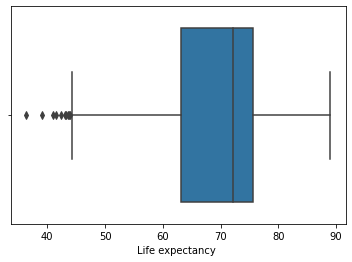

In [429]:
## Checking the distribution of the target

sns.boxplot(df['Life expectancy '])
plt.show()

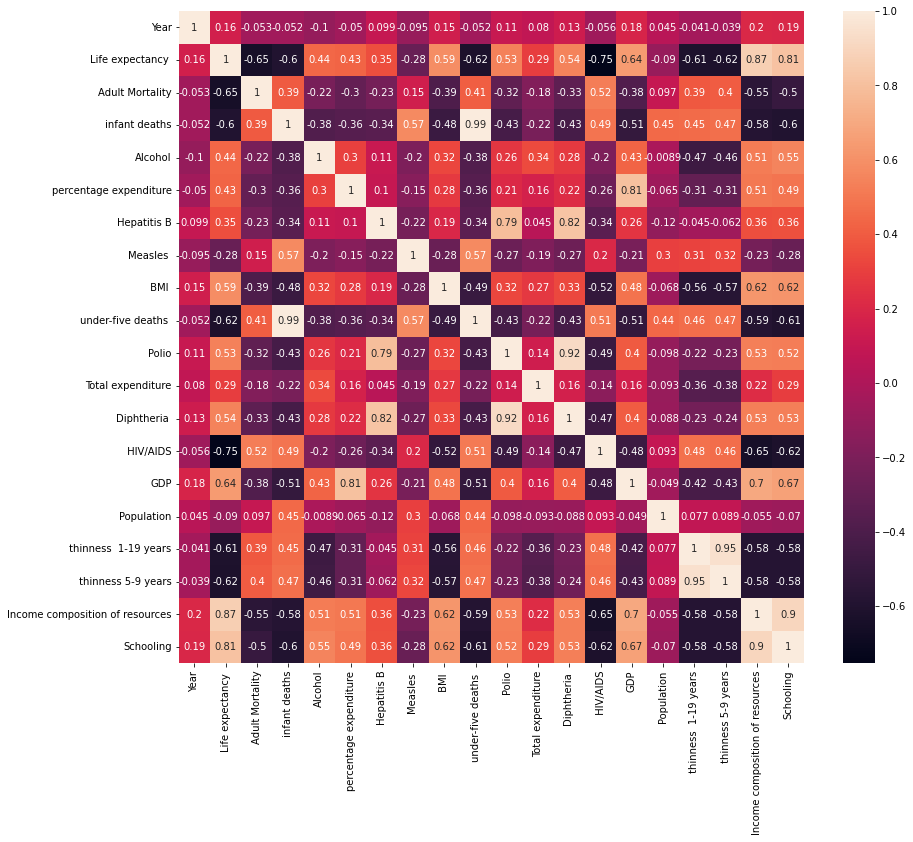

In [430]:
## Check correlation between target/label 'Life Expectancy' and features

plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

## **Feature Engineering**

### **Handling Missing Value**

The missing value will be handled with imputation method. The imputatation will use features that have highest correlation with the concerned features that does not have any missing value. We will not impute the missing value on features with the label/target.

In [431]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We need to drop the row where the target/label have a missing value

In [432]:
df = df.dropna(subset=['Life expectancy ']) ## Dropping missing value on target

In [433]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

Now for the rest of the missing value, we will impute each of the missing value based on other features.

### **Impute Population Features**

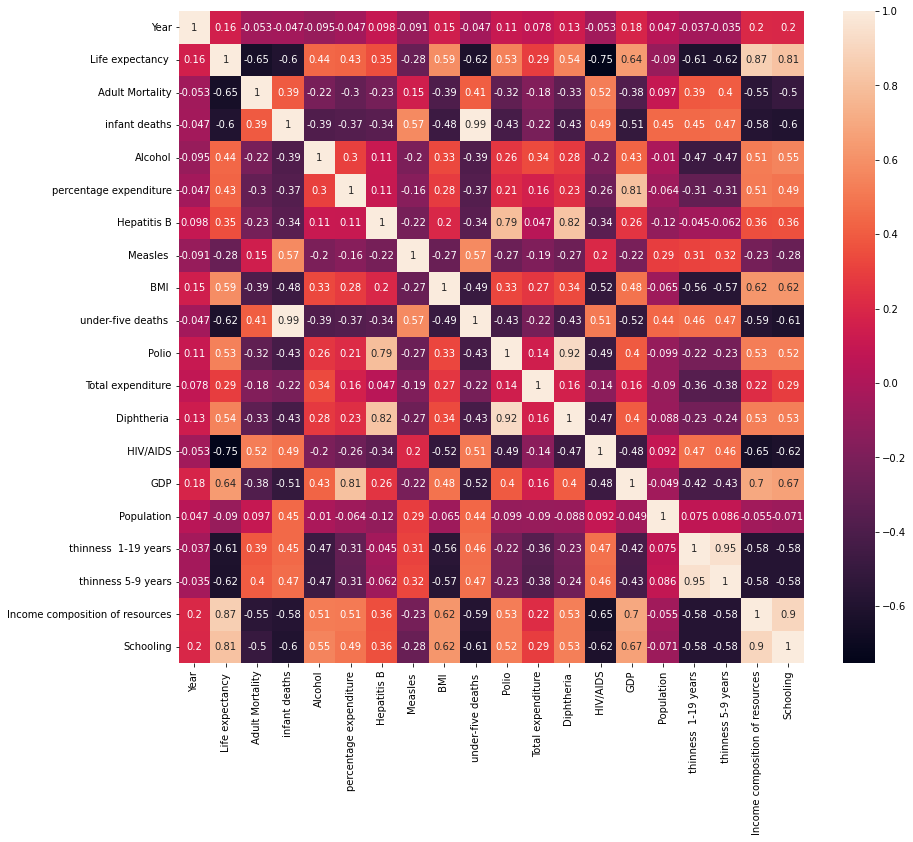

In [434]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We will impute the Population features with Infant Deaths

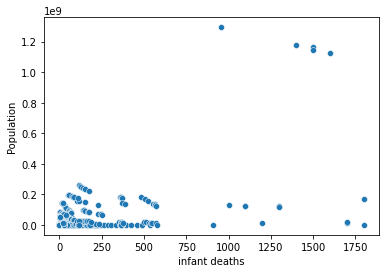

In [435]:
sns.scatterplot(x=df['infant deaths'],y=df['Population'])
plt.show()

We will impute the population missing value based on infant deaths range on the scatterplot.

In [436]:
fillpop1 = df[df['infant deaths'] < 125]['Population'].mean()
fillpop2 = df[(df['infant deaths'] >= 125) & ((df['infant deaths'] < 250))]['Population'].mean()
fillpop3 = df[(df['infant deaths'] >= 250) & ((df['infant deaths'] < 375))]['Population'].mean()
fillpop4 = df[(df['infant deaths'] >= 375) & ((df['infant deaths'] < 500))]['Population'].mean()
fillpop5 = df[(df['infant deaths'] >= 500) & ((df['infant deaths'] < 625))]['Population'].mean()
fillpop6 = df[(df['infant deaths'] >= 625) & ((df['infant deaths'] < 750))]['Population'].mean()
fillpop7 = df[(df['infant deaths'] >= 750) & ((df['infant deaths'] < 875))]['Population'].mean()
fillpop8 = df[(df['infant deaths'] >= 875) & ((df['infant deaths'] < 1000))]['Population'].mean()
fillpop9 = df[(df['infant deaths'] >= 1000) & ((df['infant deaths'] < 1125))]['Population'].mean()
fillpop10 = df[(df['infant deaths'] >= 1125) & ((df['infant deaths'] < 1250))]['Population'].mean()
fillpop11 = df[(df['infant deaths'] >= 1250) & ((df['infant deaths'] < 1375))]['Population'].mean()
fillpop12 = df[(df['infant deaths'] >= 1375) & ((df['infant deaths'] < 1500))]['Population'].mean()
fillpop13 = df[(df['infant deaths'] >= 1500) & ((df['infant deaths'] < 1625))]['Population'].mean()
fillpop14 = df[(df['infant deaths'] >= 1625) & ((df['infant deaths'] < 1750))]['Population'].mean()
fillpop15 = df[df['infant deaths'] >= 1750]['Population'].mean()

In [437]:
def fillna_Pop(cols):
    Pop=cols[0]
    Inf=cols[1]
    if pd.isnull(Pop):
        if Inf<125:
            return fillpop1
        elif 250>Inf>=125:
            return fillpop2
        elif 375>Inf>=250:
            return fillpop3
        elif 500>Inf>=375:
            return fillpop4
        elif 625>Inf>=500:
            return fillpop5
        elif 750>Inf>=625:
            return fillpop6
        elif 875>Inf>=750:
            return fillpop7
        elif 1000>Inf>=875:
            return fillpop8
        elif 1125>Inf>=1000:
            return fillpop9
        elif 1250>Inf>=1125:
            return fillpop10
        elif 1375>Inf>=1250:
            return fillpop11
        elif 1500>Inf>=1375:
            return fillpop12
        elif 1625>Inf>=1500:
            return fillpop13
        elif 1750>Inf>=1625:
            return fillpop14
        elif Inf>=1750:
            return fillpop15
    else:
        return Pop

In [438]:
df['Population']=df[['infant deaths','Population']].apply(fillna_Pop,axis=1)

In [439]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

### Impute GDP Features

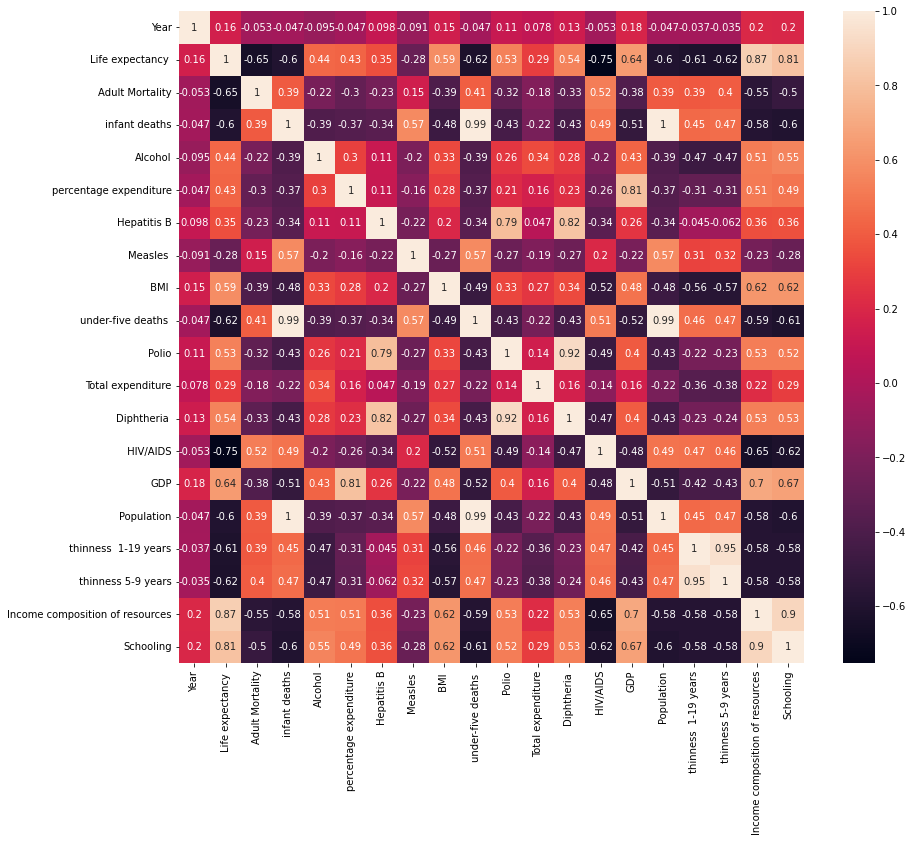

In [440]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We will impute the GDP features with percentage expenditure

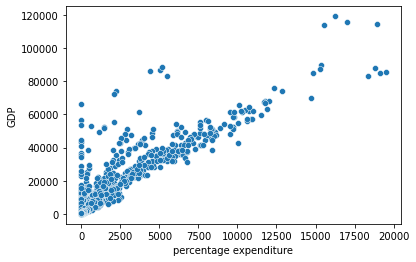

In [441]:
sns.scatterplot(x=df['percentage expenditure'],y=df['GDP'])
plt.show()

In [442]:
fillgdp1 = df[df['percentage expenditure'] < 1250]['GDP'].mean()
fillgdp2 = df[(df['percentage expenditure'] >= 1250) & ((df['percentage expenditure'] < 2500))]['GDP'].mean()
fillgdp3 = df[(df['percentage expenditure'] >= 2500) & ((df['percentage expenditure'] < 3750))]['GDP'].mean()
fillgdp4 = df[(df['percentage expenditure'] >= 3750) & ((df['percentage expenditure'] < 5000))]['GDP'].mean()
fillgdp5 = df[(df['percentage expenditure'] >= 5000) & ((df['percentage expenditure'] < 6250))]['GDP'].mean()
fillgdp6 = df[(df['percentage expenditure'] >= 6250) & ((df['percentage expenditure'] < 7500))]['GDP'].mean()
fillgdp7 = df[(df['percentage expenditure'] >= 7500) & ((df['percentage expenditure'] < 8750))]['GDP'].mean()
fillgdp8 = df[(df['percentage expenditure'] >= 8750) & ((df['percentage expenditure'] < 10000))]['GDP'].mean()
fillgdp9 = df[(df['percentage expenditure'] >= 10000) & ((df['percentage expenditure'] < 11250))]['GDP'].mean()
fillgdp10 = df[(df['percentage expenditure'] >= 11250) & ((df['percentage expenditure'] < 12500))]['GDP'].mean()
fillgdp11 = df[(df['percentage expenditure'] >= 12500) & ((df['percentage expenditure'] < 13750))]['GDP'].mean()
fillgdp12 = df[(df['percentage expenditure'] >= 13750) & ((df['percentage expenditure'] < 15000))]['GDP'].mean()
fillgdp13 = df[(df['percentage expenditure'] >= 15000) & ((df['percentage expenditure'] < 16250))]['GDP'].mean()
fillgdp14 = df[(df['percentage expenditure'] >= 16250) & ((df['percentage expenditure'] < 17500))]['GDP'].mean()
fillgdp15 = df[df['percentage expenditure'] >= 17500]['GDP'].mean()

In [443]:
def fillna_GDP(cols):
    GDP=cols[0]
    Pex=cols[1]
    if pd.isnull(GDP):
        if Pex<1250:
            return fillgdp1
        elif 2500>Pex>=1250:
            return fillgdp2
        elif 3750>Pex>=2500:
            return fillgdp3
        elif 5000>Pex>=3750:
            return fillgdp4
        elif 6250>Pex>=5000:
            return fillgdp5
        elif 7500>Pex>=6250:
            return fillgdp6
        elif 8750>Pex>=7500:
            return fillgdp7
        elif 10000>Pex>=8750:
            return fillgdp8
        elif 11250>Pex>=10000:
            return fillgdp9
        elif 12500>Pex>=11250:
            return fillgdp10
        elif 13750>Pex>=12500:
            return fillgdp11
        elif 15000>Pex>=13750:
            return fillgdp12
        elif 16250>Pex>=15000:
            return fillgdp13
        elif 17500>Pex>=16250:
            return fillgdp14
        elif Pex>=17500:
            return fillgdp15
    else:
        return GDP

In [444]:
df['GDP']=df[['percentage expenditure','GDP']].apply(fillna_GDP,axis=1)

In [445]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

### Imputing 'Income composition of resources' Features

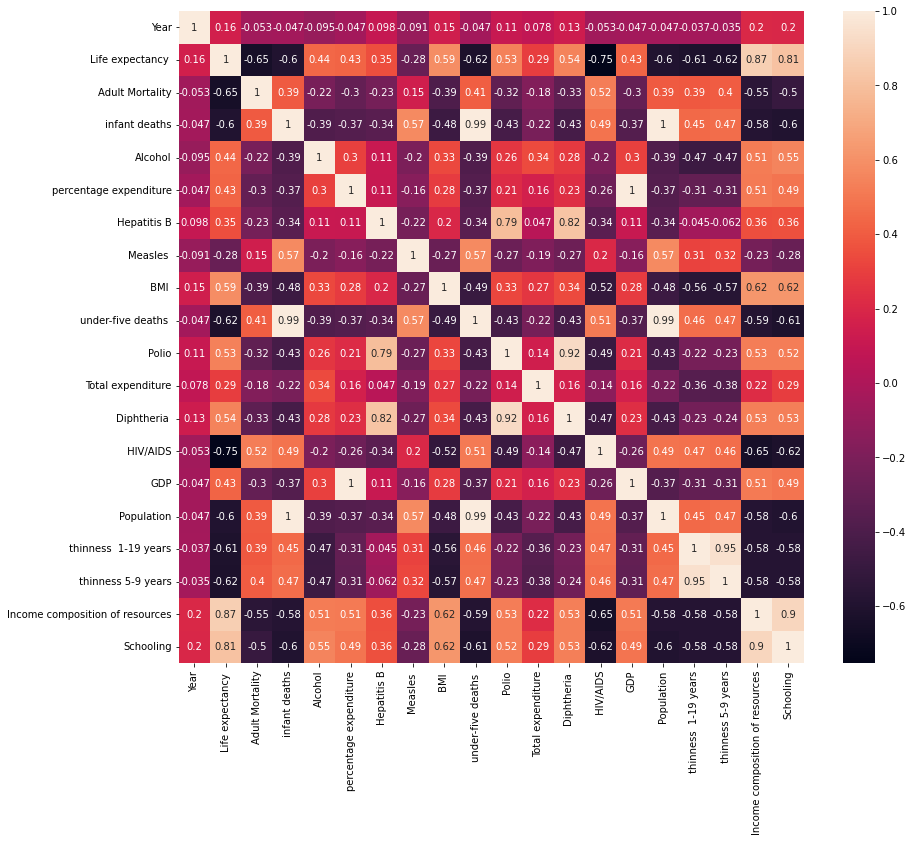

In [446]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We will impute the Income Composition of Resources features with GDP

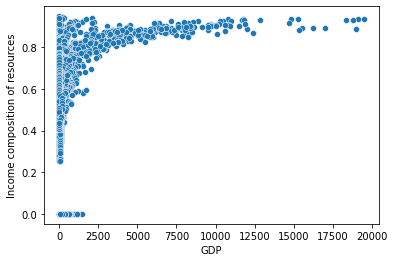

In [447]:
sns.scatterplot(x=df['GDP'],y=df['Income composition of resources'])
plt.show()

In [448]:
fillinc1 = df[df['GDP'] < 1250]['GDP'].mean()
fillinc2 = df[(df['GDP'] >= 1250) & ((df['GDP'] < 2500))]['Income composition of resources'].mean()
fillinc3 = df[(df['GDP'] >= 2500) & ((df['GDP'] < 3750))]['Income composition of resources'].mean()
fillinc4 = df[(df['GDP'] >= 3750) & ((df['GDP'] < 5000))]['Income composition of resources'].mean()
fillinc5 = df[(df['GDP'] >= 5000) & ((df['GDP'] < 6250))]['Income composition of resources'].mean()
fillinc6 = df[(df['GDP'] >= 6250) & ((df['GDP'] < 7500))]['Income composition of resources'].mean()
fillinc7 = df[(df['GDP'] >= 7500) & ((df['GDP'] < 8750))]['Income composition of resources'].mean()
fillinc8 = df[(df['GDP'] >= 8750) & ((df['GDP'] < 10000))]['Income composition of resources'].mean()
fillinc9 = df[(df['GDP'] >= 10000) & ((df['GDP'] < 11250))]['Income composition of resources'].mean()
fillinc10 = df[(df['GDP'] >= 11250) & ((df['GDP'] < 12500))]['Income composition of resources'].mean()
fillinc11 = df[(df['GDP'] >= 12500) & ((df['GDP'] < 13750))]['Income composition of resources'].mean()
fillinc12 = df[(df['GDP'] >= 13750) & ((df['GDP'] < 15000))]['Income composition of resources'].mean()
fillinc13 = df[(df['GDP'] >= 15000) & ((df['GDP'] < 16250))]['Income composition of resources'].mean()
fillinc14 = df[(df['GDP'] >= 16250) & ((df['GDP'] < 17500))]['Income composition of resources'].mean()
fillinc15 = df[(df['GDP'] >= 17500) & ((df['GDP'] < 20000))]['Income composition of resources'].mean()
fillinc16 = df[df['GDP'] >= 20000]['Income composition of resources'].mean()

In [449]:
def fillna_Inc(cols):
    Inc=cols[0]
    GDP=cols[1]
    if pd.isnull(Inc):
        if GDP<1250:
            return fillinc1
        elif 2500>GDP>=1250:
            return fillinc2
        elif 3750>GDP>=2500:
            return fillinc3
        elif 5000>GDP>=3750:
            return fillinc4
        elif 6250>GDP>=5000:
            return fillinc5
        elif 7500>GDP>=6250:
            return fillinc6
        elif 8750>GDP>=7500:
            return fillinc7
        elif 10000>GDP>=8750:
            return fillinc8
        elif 11250>GDP>=10000:
            return fillinc9
        elif 12500>GDP>=11250:
            return fillinc10
        elif 13750>GDP>=12500:
            return fillinc11
        elif 15000>GDP>=13750:
            return fillinc12
        elif 16250>GDP>=15000:
            return fillinc13
        elif 17500>GDP>=16250:
            return fillinc14
        elif 20000>GDP>=17500:
            return fillinc15
        elif GDP>=20000:
            return fillinc16
    else:
        return Inc

In [450]:
df['Income composition of resources']=df[['Income composition of resources','GDP']].apply(fillna_Inc,axis=1)

In [451]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources      0
Schooling                          160
dtype: int64

### Imputing Schooling Features

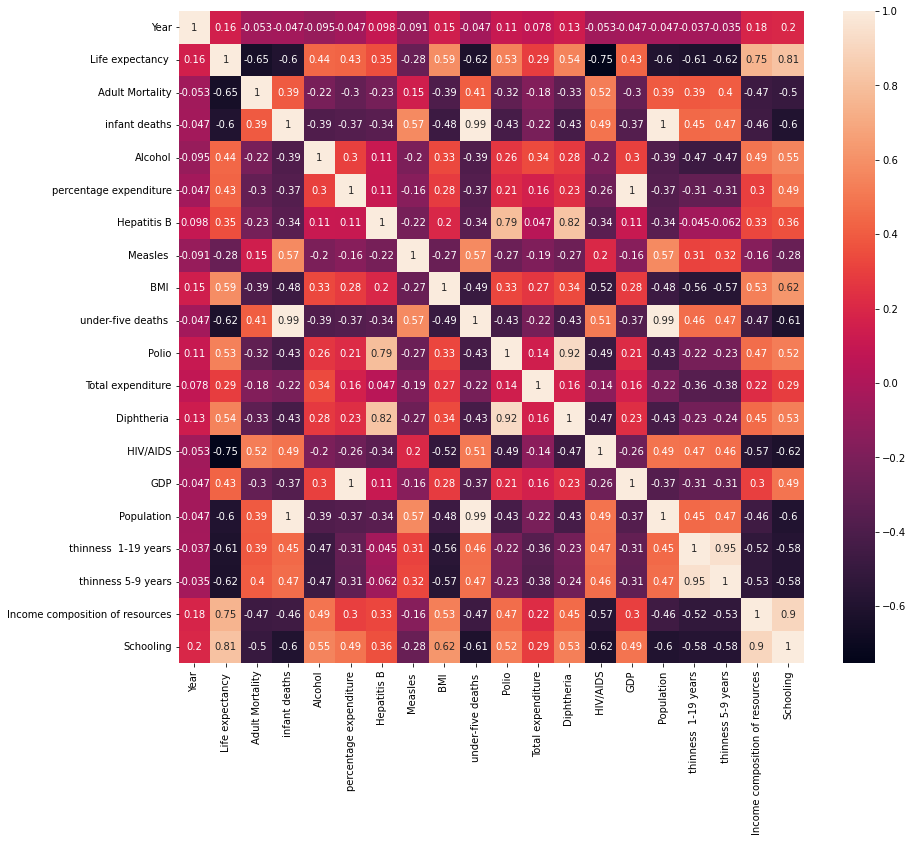

In [452]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We can see that Schooling is also correlated with Income Comp

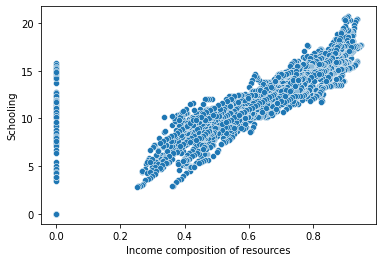

In [453]:
sns.scatterplot(x=df['Income composition of resources'],y=df['Schooling'])
plt.show()

In [454]:
fillsch1 = df[df['Income composition of resources'] < 0.1]['Schooling'].mean()
fillsch2 = df[(df['Income composition of resources'] >= 0.1) & ((df['Income composition of resources'] < 0.2))]['Schooling'].mean()
fillsch3 = df[(df['Income composition of resources'] >= 0.2) & ((df['Income composition of resources'] < 0.3))]['Schooling'].mean()
fillsch4 = df[(df['Income composition of resources'] >= 0.3) & ((df['Income composition of resources'] < 0.4))]['Schooling'].mean()
fillsch5 = df[(df['Income composition of resources'] >= 0.4) & ((df['Income composition of resources'] < 0.5))]['Schooling'].mean()
fillsch6 = df[(df['Income composition of resources'] >= 0.5) & ((df['Income composition of resources'] < 0.6))]['Schooling'].mean()
fillsch7 = df[(df['Income composition of resources'] >= 0.6) & ((df['Income composition of resources'] < 0.7))]['Schooling'].mean()
fillsch8 = df[(df['Income composition of resources'] >= 0.7) & ((df['Income composition of resources'] < 0.8))]['Schooling'].mean()
fillsch9 = df[df['Income composition of resources'] >= 0.8]['Schooling'].mean()

In [455]:
def fillna_Sch(cols):
    Sch=cols[0]
    Inc=cols[1]
    if pd.isnull(Sch):
        if Inc<0.1:
            return fillsch1
        elif 0.2>Inc>=0.1:
            return fillsch2
        elif 0.3>Inc>=0.2:
            return fillsch3
        elif 0.4>Inc>=0.3:
            return fillsch4
        elif 0.5>Inc>=0.4:
            return fillsch5
        elif 0.6>Inc>=0.5:
            return fillsch6
        elif 0.7>Inc>=0.6:
            return fillsch7
        elif 0.8>Inc>=0.7:
            return fillsch8
        elif Inc>=0.8:
            return fillsch9
    else:
        return Sch

In [456]:
df['Schooling']=df[['Schooling','Income composition of resources']].apply(fillna_Sch,axis=1)

In [457]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources      0
Schooling                            0
dtype: int64

### Impute Alcohol Features

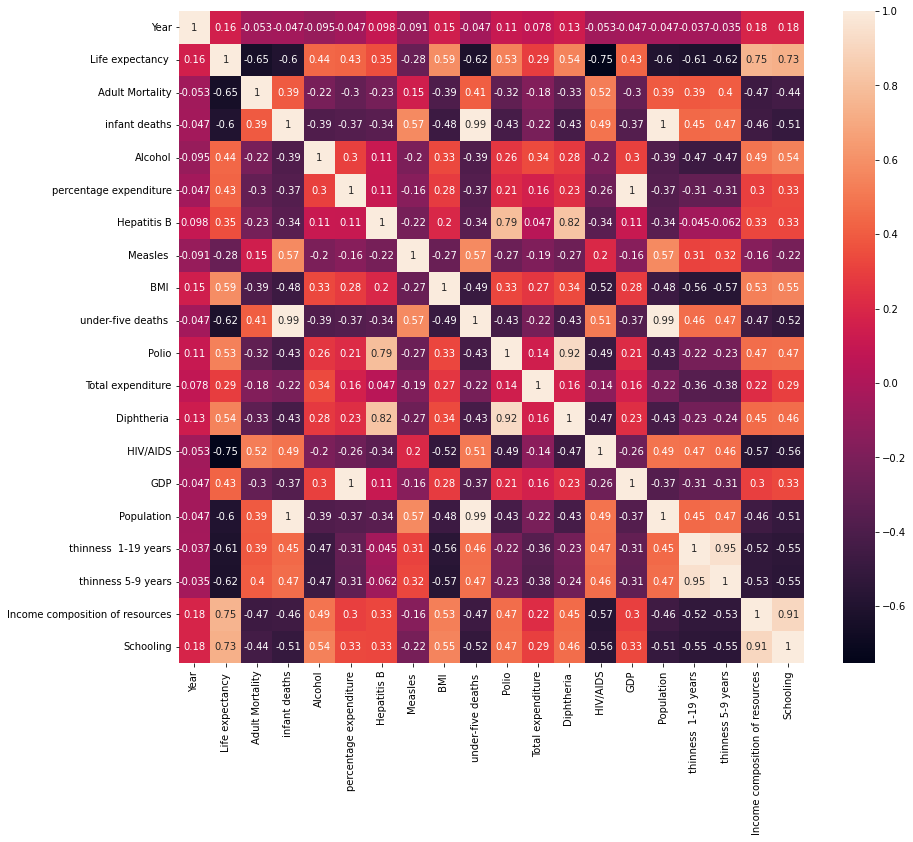

In [458]:
## Filling Alcohol with highly correlated features

plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We can see that the highest correlation for alcohol is with 'Schooling' features.

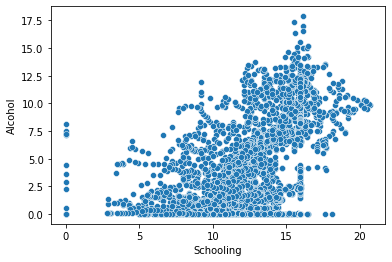

In [459]:
sns.scatterplot(x=df['Schooling'],y=df['Alcohol'])
plt.show()

In [460]:
## We use 3 years range of schooling to impute 'Alcohol' Features.
## this is due to each of school stages usually ranging from 2-4 years. Source: https://en.wikipedia.org/wiki/Educational_stage  

fillalc1 = df[df['Schooling'] < 3]['Alcohol'].mean()
fillalc2 = df[(df['Schooling'] >= 3) & ((df['Schooling'] < 6))]['Alcohol'].mean()
fillalc3 = df[(df['Schooling'] >= 6) & ((df['Schooling'] < 9))]['Alcohol'].mean()
fillalc4 = df[(df['Schooling'] >= 9) & ((df['Schooling'] < 12))]['Alcohol'].mean()
fillalc5 = df[(df['Schooling'] >= 12) & ((df['Schooling'] < 15))]['Alcohol'].mean()
fillalc6 = df[(df['Schooling'] >= 15) & ((df['Schooling'] < 18))]['Alcohol'].mean()
fillalc7 = df[(df['Schooling'] >= 18) & ((df['Schooling'] < 20))]['Alcohol'].mean()
fillalc8 = df[df['Schooling'] >= 20]['Alcohol'].mean()

In [461]:
def fillna_Alcohol(cols):
    alc=cols[0]
    sch=cols[1]
    if pd.isnull(alc):
        if sch<3:
            return fillalc1
        elif 6>sch>=3:
            return fillalc2
        elif 9>sch>=6:
            return fillalc3
        elif 12>sch>=9:
            return fillalc4
        elif 15>sch>=12:
            return fillalc5
        elif 18>sch>=15:
            return fillalc6
        elif 20>sch>=18:
            return fillalc7
        elif sch >= 20:
            return fillalc8
    else:
        return alc

In [462]:
df['Alcohol']=df[['Alcohol','Schooling']].apply(fillna_Alcohol,axis=1)

In [463]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources      0
Schooling                            0
dtype: int64

### Impute Total Expenditure Features

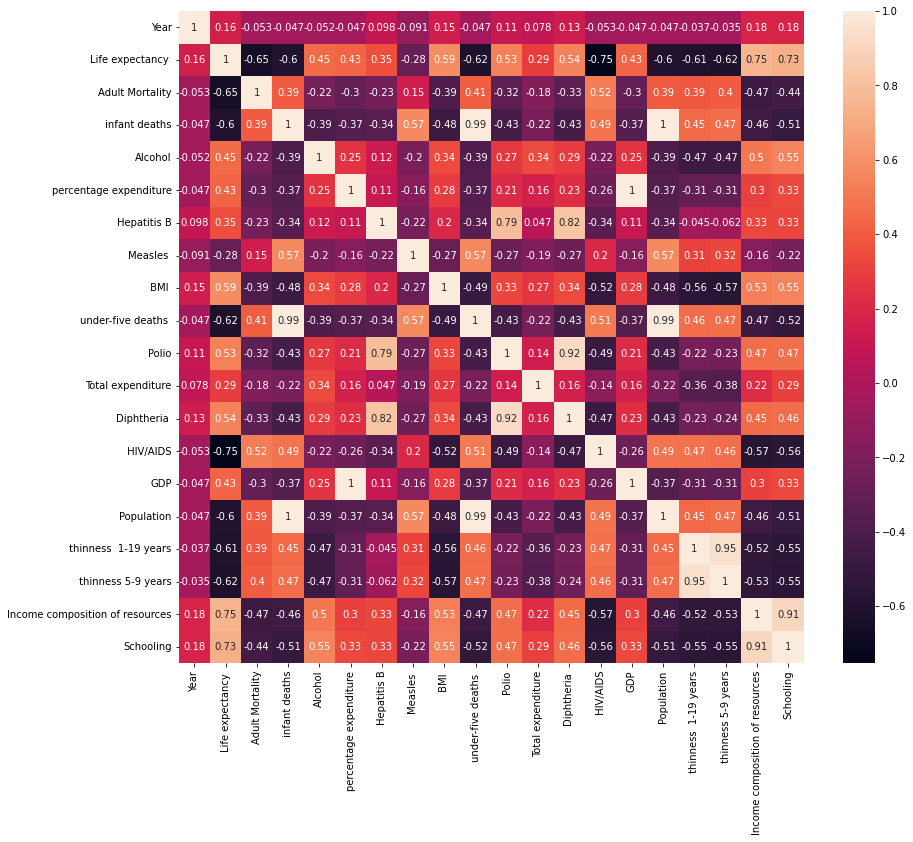

In [464]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

'Total Expenditure' features have the highest correlation with 'Alcohol' features. So we will impute Total Expenditure with Alcohol.

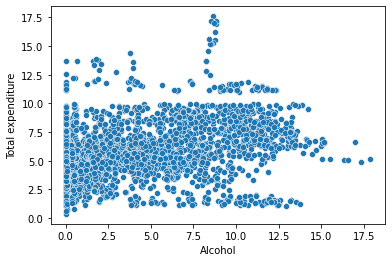

In [465]:
sns.scatterplot(x=df['Alcohol'],y=df['Total expenditure'])
plt.show()

In [466]:
filltexp1 = df[df['Alcohol'] < 1.25]['Total expenditure'].mean()
filltexp2 = df[(df['Alcohol'] >= 1.25) & ((df['Alcohol'] < 2.5))]['Total expenditure'].mean()
filltexp3 = df[(df['Alcohol'] >= 2.5) & ((df['Alcohol'] < 3.75))]['Total expenditure'].mean()
filltexp4 = df[(df['Alcohol'] >= 3.75) & ((df['Alcohol'] < 5.0))]['Total expenditure'].mean()
filltexp5 = df[(df['Alcohol'] >= 5.0) & ((df['Alcohol'] < 6.25))]['Total expenditure'].mean()
filltexp6 = df[(df['Alcohol'] >= 6.25) & ((df['Alcohol'] < 7.5))]['Total expenditure'].mean()
filltexp7 = df[(df['Alcohol'] >= 7.5) & ((df['Alcohol'] < 8.75))]['Total expenditure'].mean()
filltexp8 = df[(df['Alcohol'] >= 8.75) & ((df['Alcohol'] < 10.0))]['Total expenditure'].mean()
filltexp9 = df[(df['Alcohol'] >= 10.0) & ((df['Alcohol'] < 11.25))]['Total expenditure'].mean()
filltexp10 = df[(df['Alcohol'] >= 11.25) & ((df['Alcohol'] < 12.5))]['Total expenditure'].mean()
filltexp11 = df[(df['Alcohol'] >= 12.5) & ((df['Alcohol'] < 13.75))]['Total expenditure'].mean()
filltexp12 = df[(df['Alcohol'] >= 13.75) & ((df['Alcohol'] < 15.0))]['Total expenditure'].mean()
filltexp13 = df[(df['Alcohol'] >= 15.0) & ((df['Alcohol'] < 16.25))]['Total expenditure'].mean()
filltexp14 = df[(df['Alcohol'] >= 16.25) & ((df['Alcohol'] < 17.50))]['Total expenditure'].mean()
filltexp15 = df[df['Alcohol'] >= 17.50]['Total expenditure'].mean()

In [467]:
def fillna_Texp(cols):
    Texp=cols[0]
    Alc=cols[1]
    if pd.isnull(Texp):
        if Alc<1.25:
            return filltexp1
        elif 2.5>Alc>=1.25:
            return filltexp2
        elif 3.75>Alc>=2.5:
            return filltexp3
        elif 5.0>Alc>=3.75:
            return filltexp4
        elif 6.25>Alc>=5.0:
            return filltexp5
        elif 7.5>Alc>=6.25:
            return filltexp6
        elif 8.75>Alc>=7.5:
            return filltexp7
        elif 10.0>Alc>=8.75:
            return filltexp8
        elif 11.25>Alc>=10.0:
            return filltexp9
        elif 12.5>Alc>=11.25:
            return filltexp10
        elif 13.75>Alc>=12.5:
            return filltexp11
        elif 15.0>Alc>=13.75:
            return filltexp12
        elif 16.25>Alc>=15.0:
            return filltexp13
        elif 17.50>Alc>=16.25:
            return filltexp14
        elif Alc>=17.50:
            return filltexp15
    else:
        return Texp

In [468]:
df['Total expenditure']=df[['Total expenditure','Alcohol']].apply(fillna_Texp,axis=1)

In [469]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources      0
Schooling                            0
dtype: int64

### Filling Polio and Diphteria

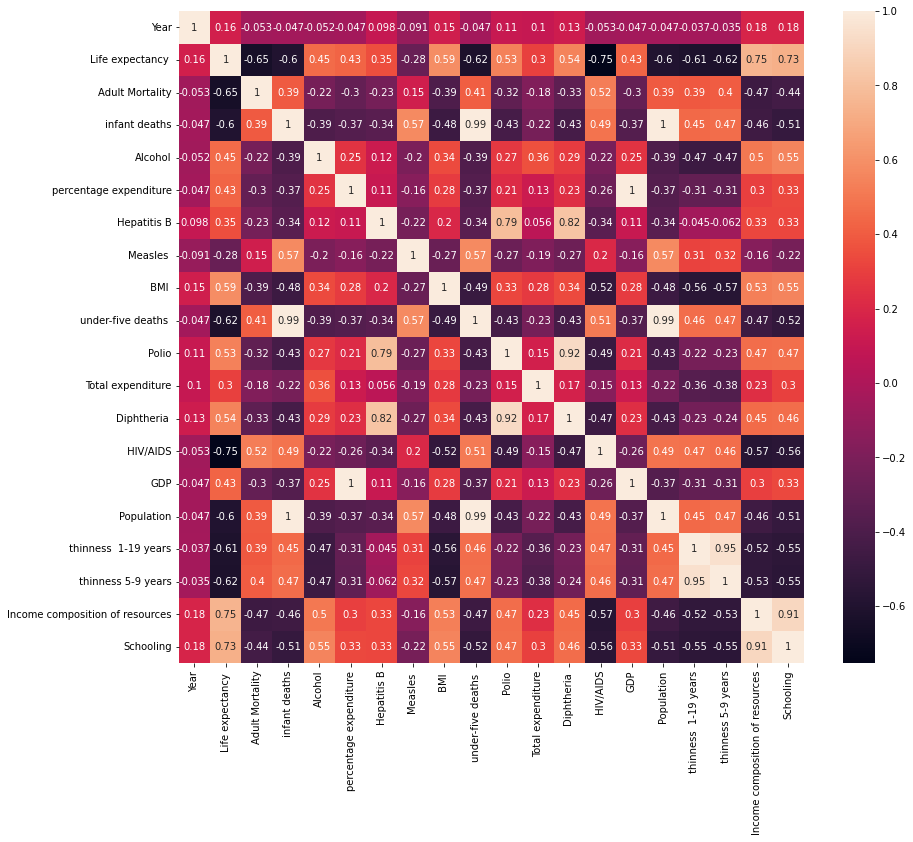

In [470]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We can see that 'Polio' and 'Diphtheria' features are closely correlated with each other. 

We will first impute the Polio features with either 'Schooling' or 'Income Composition of Resources'. We did not choose to impute with 'life expectancy' because it is a target and we did not impute with 'Hepatitis B' features because it has many missing value. 

Let's first impute the Polio missing value with 'Schooling' features.

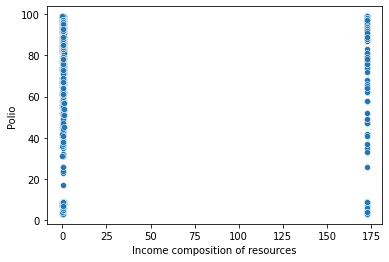

In [471]:
sns.scatterplot(x=df['Income composition of resources'],y=df['Polio'])
plt.show()

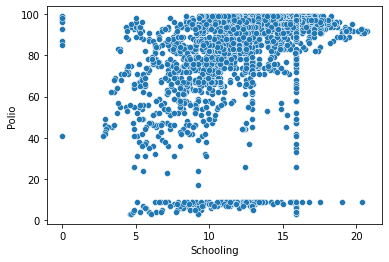

In [472]:
sns.scatterplot(x=df['Schooling'],y=df['Polio'])
plt.show()

From both of the scatterplot, we will choose to impute the 'Polio' features with 'Schooling' because it is better distributed.

In [473]:
fillpol1 = df[df['Schooling'] < 3]['Polio'].mean()
fillpol2 = df[(df['Schooling'] >= 3) & ((df['Schooling'] < 6))]['Polio'].mean()
fillpol3 = df[(df['Schooling'] >= 6) & ((df['Schooling'] < 9))]['Polio'].mean()
fillpol4 = df[(df['Schooling'] >= 9) & ((df['Schooling'] < 12))]['Polio'].mean()
fillpol5 = df[(df['Schooling'] >= 12) & ((df['Schooling'] < 15))]['Polio'].mean()
fillpol6 = df[(df['Schooling'] >= 15) & ((df['Schooling'] < 18))]['Polio'].mean()
fillpol7 = df[(df['Schooling'] >= 18) & ((df['Schooling'] < 20))]['Polio'].mean()
fillpol8 = df[df['Schooling'] >= 20]['Polio'].mean()

In [474]:
def fillna_Pol(cols):
    Pol=cols[0]
    sch=cols[1]
    if pd.isnull(Pol):
        if sch<3:
            return fillpol1
        elif 6>sch>=3:
            return fillpol2
        elif 9>sch>=6:
            return fillpol3
        elif 12>sch>=9:
            return fillpol4
        elif 15>sch>=12:
            return fillpol5
        elif 18>sch>=15:
            return fillpol6
        elif 20>sch>=18:
            return fillpol7
        elif sch >= 20:
            return fillpol8
    else:
        return Pol

In [475]:
df['Polio']=df[['Polio','Schooling']].apply(fillna_Pol,axis=1)

In [476]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources      0
Schooling                            0
dtype: int64

Now let's impute the 'Diphteria' features with 'Polio' 

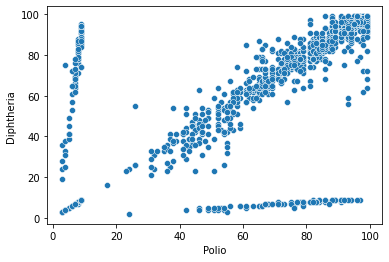

In [477]:
sns.scatterplot(x=df['Polio'],y=df['Diphtheria '])
plt.show()

In [478]:
filldip1 = df[df['Polio'] < 10]['Diphtheria '].mean()
filldip2 = df[(df['Polio'] >= 10) & ((df['Polio'] < 20))]['Diphtheria '].mean()
filldip3 = df[(df['Polio'] >= 20) & ((df['Polio'] < 30))]['Diphtheria '].mean()
filldip4 = df[(df['Polio'] >= 30) & ((df['Polio'] < 40))]['Diphtheria '].mean()
filldip5 = df[(df['Polio'] >= 40) & ((df['Polio'] < 50))]['Diphtheria '].mean()
filldip6 = df[(df['Polio'] >= 50) & ((df['Polio'] < 60))]['Diphtheria '].mean()
filldip7 = df[(df['Polio'] >= 60) & ((df['Polio'] < 70))]['Diphtheria '].mean()
filldip8 = df[(df['Polio'] >= 70) & ((df['Polio'] < 80))]['Diphtheria '].mean()
filldip9 = df[(df['Polio'] >= 80) & ((df['Polio'] < 90))]['Diphtheria '].mean()
filldip10 = df[(df['Polio'] >= 90) & ((df['Polio'] < 100))]['Diphtheria '].mean()
filldip11 = df[df['Polio'] >= 100]['Diphtheria '].mean()

In [479]:
def fillna_Dip(cols):
    Dip=cols[0]
    Pol=cols[1]
    if pd.isnull(Dip):
        if Pol<10:
            return filldip1
        elif 20>Pol>=10:
            return filldip2
        elif 30>Pol>=20:
            return filldip3
        elif 40>Pol>=30:
            return filldip4
        elif 50>Pol>=40:
            return filldip5
        elif 60>Pol>=50:
            return filldip6
        elif 70>Pol>=60:
            return filldip7
        elif 80>Pol>=70:
            return filldip8
        elif 90>Pol>=80:
            return filldip9
        elif 100>Pol>=90:
            return filldip10
        elif Pol>=100:
            return filldip11
    else:
        return Dip

In [480]:
df['Diphtheria ']=df[['Diphtheria ','Polio']].apply(fillna_Dip,axis=1)

In [481]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources      0
Schooling                            0
dtype: int64

### Impute Hepatitis B Features

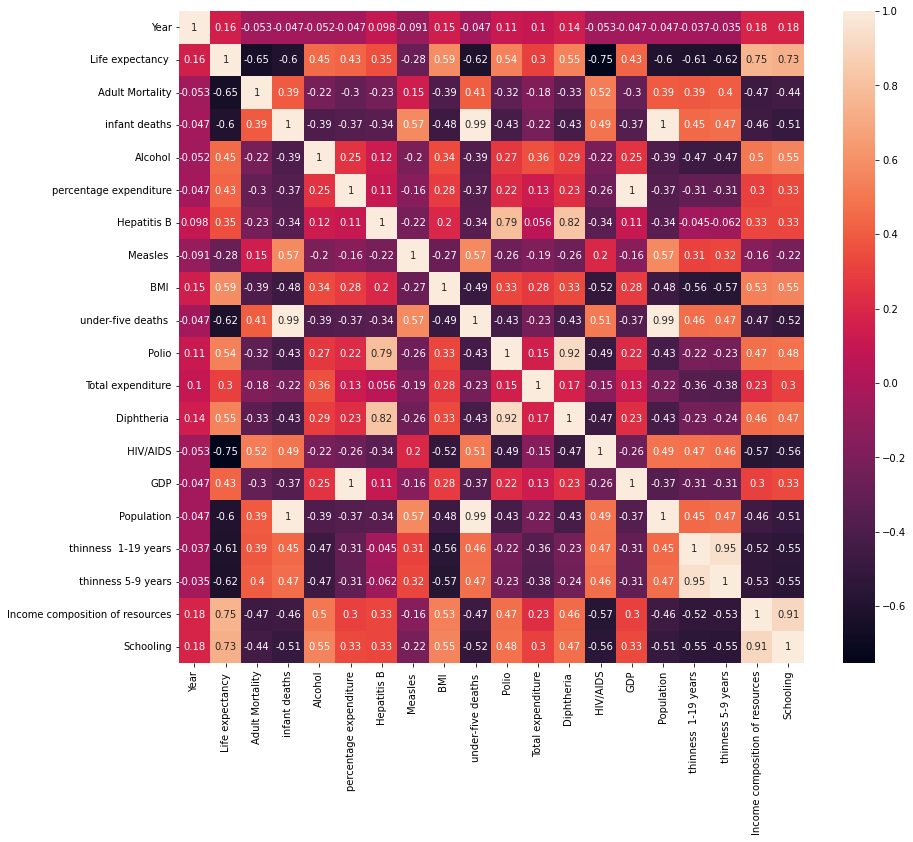

In [482]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We can see that Hepatitis B are correlated with Diphtheria.

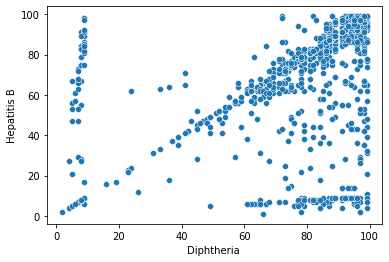

In [483]:
sns.scatterplot(x=df['Diphtheria '],y=df['Hepatitis B'])
plt.show()

In [484]:
fillhepb1 = df[df['Diphtheria '] < 10]['Hepatitis B'].mean()
fillhepb2 = df[(df['Diphtheria '] >= 10) & ((df['Diphtheria '] < 20))]['Hepatitis B'].mean()
fillhepb3 = df[(df['Diphtheria '] >= 20) & ((df['Diphtheria '] < 30))]['Hepatitis B'].mean()
fillhepb4 = df[(df['Diphtheria '] >= 30) & ((df['Diphtheria '] < 40))]['Hepatitis B'].mean()
fillhepb5 = df[(df['Diphtheria '] >= 40) & ((df['Diphtheria '] < 50))]['Hepatitis B'].mean()
fillhepb6 = df[(df['Diphtheria '] >= 50) & ((df['Diphtheria '] < 60))]['Hepatitis B'].mean()
fillhepb7 = df[(df['Diphtheria '] >= 60) & ((df['Diphtheria '] < 70))]['Hepatitis B'].mean()
fillhepb8 = df[(df['Diphtheria '] >= 70) & ((df['Diphtheria '] < 80))]['Hepatitis B'].mean()
fillhepb9 = df[(df['Diphtheria '] >= 80) & ((df['Diphtheria '] < 90))]['Hepatitis B'].mean()
fillhepb10 = df[(df['Diphtheria '] >= 90) & ((df['Diphtheria '] < 100))]['Hepatitis B'].mean()
fillhepb11 = df[df['Diphtheria '] >= 100]['Hepatitis B'].mean()

In [485]:
def fillna_HepaB(cols):
    HepaB=cols[0]
    dip=cols[1]
    if pd.isnull(HepaB):
        if dip<10.0:
            return fillhepb1
        elif 20.0>dip>=10.0:
            return fillhepb2
        elif 30.0>dip>=20.0:
            return fillhepb3
        elif 40.0>dip>=30.0:
            return fillhepb4
        elif 50.0>dip>=40.0:
            return fillhepb5
        elif 60.0>dip>=50.0:
            return fillhepb6
        elif 70.0>dip>=60.0:
            return fillhepb7
        elif 80.0>dip>=70.0:
            return fillhepb8
        elif 90.0>dip>=80.0:
            return fillhepb9
        elif 100.0>dip>=90.0:
            return fillhepb10
        elif dip>=100.0:
            return fillhepb11
    else:
        return HepaB

In [486]:
df['Hepatitis B']=df[['Hepatitis B','Diphtheria ']].apply(fillna_HepaB,axis=1)

In [487]:
df.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                               32
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years              32
 thinness 5-9 years                32
Income composition of resources     0
Schooling                           0
dtype: int64

### Imputing BMI Features

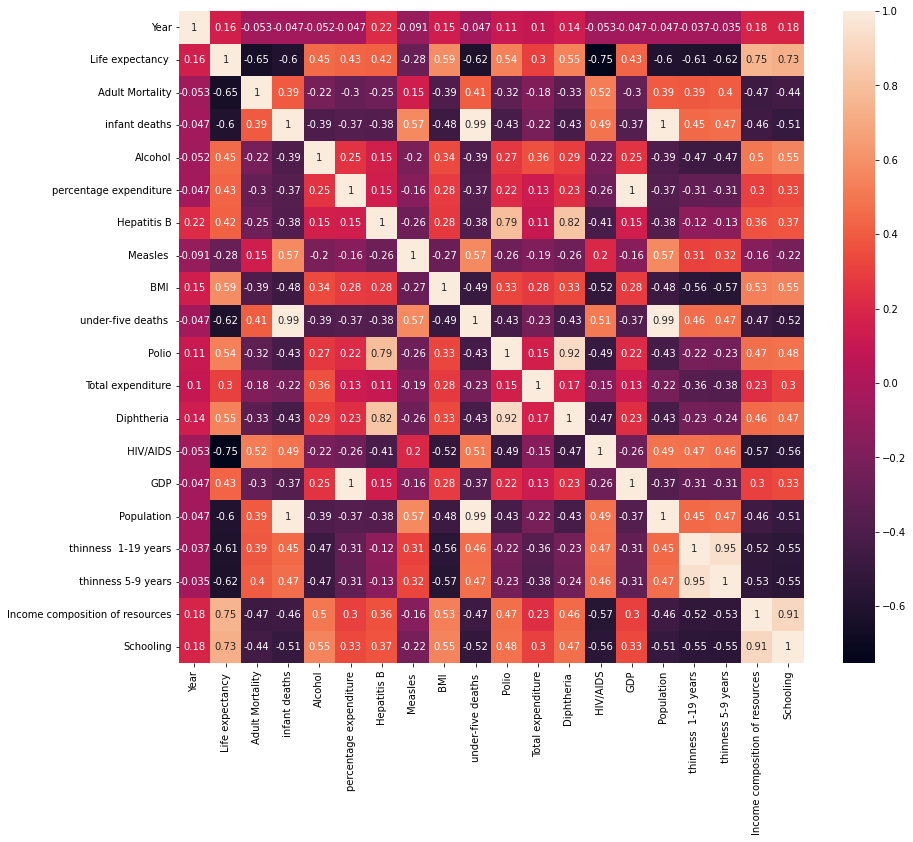

In [488]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We can see that BMI have the highest with 'Schooling' features

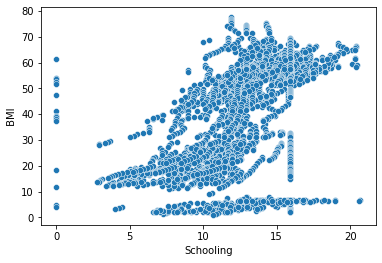

In [489]:
sns.scatterplot(x=df['Schooling'],y=df[' BMI '])
plt.show()

In [490]:
fillbmi1 = df[df['Schooling'] < 3][' BMI '].mean()
fillbmi2 = df[(df['Schooling'] >= 3) & ((df['Schooling'] < 6))][' BMI '].mean()
fillbmi3 = df[(df['Schooling'] >= 6) & ((df['Schooling'] < 9))][' BMI '].mean()
fillbmi4 = df[(df['Schooling'] >= 9) & ((df['Schooling'] < 12))][' BMI '].mean()
fillbmi5 = df[(df['Schooling'] >= 12) & ((df['Schooling'] < 15))][' BMI '].mean()
fillbmi6 = df[(df['Schooling'] >= 15) & ((df['Schooling'] < 18))][' BMI '].mean()
fillbmi7 = df[(df['Schooling'] >= 18) & ((df['Schooling'] < 20))][' BMI '].mean()
fillbmi8 = df[df['Schooling'] >= 20][' BMI '].mean()

In [491]:
def fillna_Bmi(cols):
    Bmi=cols[0]
    sch=cols[1]
    if pd.isnull(Bmi):
        if sch<3:
            return fillbmi1
        elif 6>sch>=3:
            return fillbmi2
        elif 9>sch>=6:
            return fillbmi3
        elif 12>sch>=9:
            return fillbmi4
        elif 15>sch>=12:
            return fillbmi5
        elif 18>sch>=15:
            return fillbmi6
        elif 20>sch>=18:
            return fillbmi7
        elif sch >= 20:
            return fillbmi8
    else:
        return Bmi

In [493]:
df[' BMI ']=df[[' BMI ','Schooling']].apply(fillna_Bmi,axis=1)

In [494]:
df.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years              32
 thinness 5-9 years                32
Income composition of resources     0
Schooling                           0
dtype: int64

### Impute Both 'Thin' Features

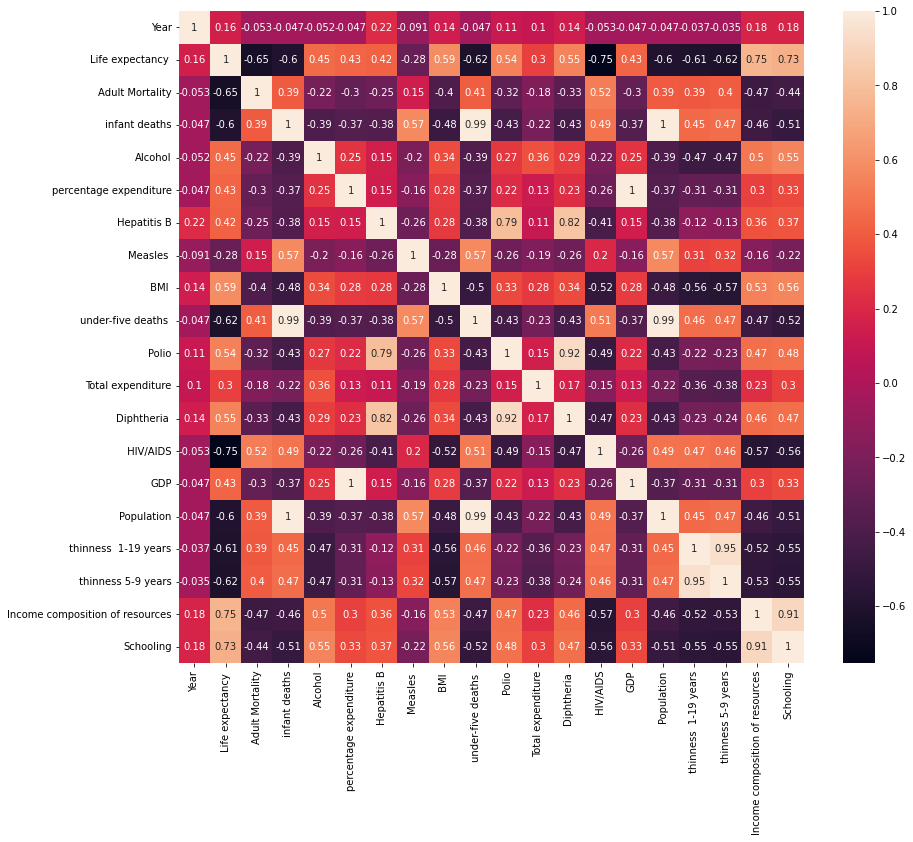

In [495]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr('spearman'), annot=True, )
plt.show()

We will impute both 'Thin' features with HIV/AIDS

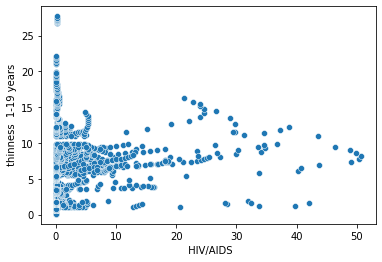

In [496]:
sns.scatterplot(x=df[' HIV/AIDS'],y=df[' thinness  1-19 years'])
plt.show()

In [497]:
fillth191 = df[df[' HIV/AIDS'] < 5][' thinness  1-19 years'].mean()
fillth192 = df[(df[' HIV/AIDS'] >= 5) & ((df[' HIV/AIDS'] < 10))][' thinness  1-19 years'].mean()
fillth193 = df[(df[' HIV/AIDS'] >= 10) & ((df[' HIV/AIDS'] < 15))][' thinness  1-19 years'].mean()
fillth194 = df[(df[' HIV/AIDS'] >= 15) & ((df[' HIV/AIDS'] < 20))][' thinness  1-19 years'].mean()
fillth195 = df[(df[' HIV/AIDS'] >= 20) & ((df[' HIV/AIDS'] < 25))][' thinness  1-19 years'].mean()
fillth196 = df[(df[' HIV/AIDS'] >= 25) & ((df[' HIV/AIDS'] < 30))][' thinness  1-19 years'].mean()
fillth197 = df[(df[' HIV/AIDS'] >= 30) & ((df[' HIV/AIDS'] < 35))][' thinness  1-19 years'].mean()
fillth198 = df[(df[' HIV/AIDS'] >= 35) & ((df[' HIV/AIDS'] < 40))][' thinness  1-19 years'].mean()
fillth199 = df[(df[' HIV/AIDS'] >= 40) & ((df[' HIV/AIDS'] < 45))][' thinness  1-19 years'].mean()
fillth1910 = df[(df[' HIV/AIDS'] >= 45) & ((df[' HIV/AIDS'] < 50))][' thinness  1-19 years'].mean()
fillth1911 = df[df[' HIV/AIDS'] >= 50][' thinness  1-19 years'].mean()

In [498]:
def fillna_Th19(cols):
    Th19=cols[0]
    HIV=cols[1]
    if pd.isnull(Th19):
        if HIV<5:
            return fillth191
        elif 10>HIV>=5:
            return fillth192
        elif 15>HIV>=10:
            return fillth193
        elif 20>HIV>=15:
            return fillth194
        elif 25>HIV>=20:
            return fillth195
        elif 30>HIV>=25:
            return fillth196
        elif 35>HIV>=30:
            return fillth197
        elif 40>HIV>=35:
            return fillth198
        elif 45>HIV>=40:
            return fillth199
        elif 50>HIV>=45:
            return fillth1910
        elif 1375>HIV>=50:
            return fillth1911
    else:
        return Th19

In [499]:
df[' thinness  1-19 years']=df[[' HIV/AIDS',' thinness  1-19 years']].apply(fillna_Th19,axis=1)

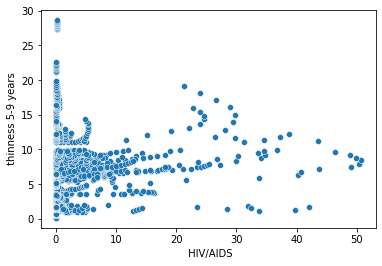

In [500]:
sns.scatterplot(x=df[' HIV/AIDS'],y=df[' thinness 5-9 years'])
plt.show()

In [501]:
fillth091 = df[df[' HIV/AIDS'] < 5][' thinness 5-9 years'].mean()
fillth092 = df[(df[' HIV/AIDS'] >= 5) & ((df[' HIV/AIDS'] < 10))][' thinness 5-9 years'].mean()
fillth093 = df[(df[' HIV/AIDS'] >= 10) & ((df[' HIV/AIDS'] < 15))][' thinness 5-9 years'].mean()
fillth094 = df[(df[' HIV/AIDS'] >= 15) & ((df[' HIV/AIDS'] < 20))][' thinness 5-9 years'].mean()
fillth095 = df[(df[' HIV/AIDS'] >= 20) & ((df[' HIV/AIDS'] < 25))][' thinness 5-9 years'].mean()
fillth096 = df[(df[' HIV/AIDS'] >= 25) & ((df[' HIV/AIDS'] < 30))][' thinness 5-9 years'].mean()
fillth097 = df[(df[' HIV/AIDS'] >= 30) & ((df[' HIV/AIDS'] < 35))][' thinness 5-9 years'].mean()
fillth098 = df[(df[' HIV/AIDS'] >= 35) & ((df[' HIV/AIDS'] < 40))][' thinness 5-9 years'].mean()
fillth099 = df[(df[' HIV/AIDS'] >= 40) & ((df[' HIV/AIDS'] < 45))][' thinness 5-9 years'].mean()
fillth0910 = df[(df[' HIV/AIDS'] >= 45) & ((df[' HIV/AIDS'] < 50))][' thinness 5-9 years'].mean()
fillth0911 = df[df[' HIV/AIDS'] >= 50][' thinness 5-9 years'].mean()

In [502]:
def fillna_Th09(cols):
    Th09=cols[0]
    HIV=cols[1]
    if pd.isnull(Th09):
        if HIV<5:
            return fillth091
        elif 10>HIV>=5:
            return fillth092
        elif 15>HIV>=10:
            return fillth093
        elif 20>HIV>=15:
            return fillth094
        elif 25>HIV>=20:
            return fillth095
        elif 30>HIV>=25:
            return fillth096
        elif 35>HIV>=30:
            return fillth097
        elif 40>HIV>=35:
            return fillth098
        elif 45>HIV>=40:
            return fillth099
        elif 50>HIV>=45:
            return fillth0910
        elif 1375>HIV>=50:
            return fillth0911
    else:
        return Th09

In [503]:
df[' thinness 5-9 years']=df[[' HIV/AIDS',' thinness 5-9 years']].apply(fillna_Th09,axis=1)

In [504]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

All the features now does not contain any null values. Thus, we can proceed to other feature engineering

## **Create dummy variable for datatype: Objects**

In [505]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [506]:
dfOHE = df.copy()

In [507]:
dfOHE['Country'].nunique()

183

In [508]:
dfOHE['Status'].nunique()

2

In [509]:
dfOHE = pd.get_dummies(dfOHE, columns = ['Country', 'Status'])

In [511]:
display(dfOHE.head(), dfOHE.shape)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,1


(2928, 205)

This is what our final dataset will look like, total row : 2928, and total columns: 205 

## **Machine Learning Modeling**

In [512]:
## Create X and y variables

XOHE = dfOHE.drop(columns='Life expectancy ')
yOHE = dfOHE['Life expectancy ']

In [513]:
## Splitting dataset for training and testing

X_trainOHE, X_testOHE, y_trainOHE, y_testOHE = train_test_split(XOHE, yOHE, test_size= .15, random_state=666)

## **Evaluation Matrix Calculation**

In [516]:
## Create def for Evaluation Matrix

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

**Linear Regression with OHE**

In [514]:
model_LR_OHE = LinearRegression()

In [515]:
model_LR_OHE.fit(X_trainOHE, y_trainOHE)

LinearRegression()

In [517]:
r2_LR_OHE_tr, MAE_LR_OHE_tr, MSE_LR_OHE_tr, RMSE_LR_OHE_tr = Eva_Matrix(model_LR_OHE, X_trainOHE, y_trainOHE)

In [518]:
r2_LR_OHE_ts, MAE_LR_OHE_ts, MSE_LR_OHE_ts, RMSE_LR_OHE_ts = Eva_Matrix(model_LR_OHE, X_testOHE, y_testOHE)

In [519]:
eva_dataLR_OHE = {
    'LinearReg Training with OHE' : [r2_LR_OHE_tr, MAE_LR_OHE_tr, MSE_LR_OHE_tr, RMSE_LR_OHE_tr],
    'LinearReg Testing with OHE' : [r2_LR_OHE_ts, MAE_LR_OHE_ts, MSE_LR_OHE_ts, RMSE_LR_OHE_ts]
}

df_LinReg_OHE = pd.DataFrame(eva_dataLR_OHE, index=['R2', 'MAE', 'MSE', 'RMSE'])

df_LinReg_OHE

,LinearReg Training with OHE,LinearReg Testing with OHE
R2,0.964403,0.957831
MAE,1.128037,1.158431
MSE,3.242103,3.718154
RMSE,1.800584,1.928252


**Ridge with OHE**

In [520]:
model_R_OHE = Ridge()

In [521]:
model_R_OHE.fit(X_trainOHE, y_trainOHE)

Ridge()

In [522]:
r2_R_OHE_tr, MAE_R_OHE_tr, MSE_R_OHE_tr, RMSE_R_OHE_tr = Eva_Matrix(model_R_OHE, X_trainOHE, y_trainOHE)

In [523]:
r2_R_OHE_ts, MAE_R_OHE_ts, MSE_R_OHE_ts, RMSE_R_OHE_ts = Eva_Matrix(model_R_OHE, X_testOHE, y_testOHE)

In [524]:
eva_dataR_OHE = {
    'Ridge Training with OHE' : [r2_R_OHE_tr, MAE_R_OHE_tr, MSE_R_OHE_tr, RMSE_R_OHE_tr],
    'Ridge Testing with OHE' : [r2_R_OHE_ts, MAE_R_OHE_ts, MSE_R_OHE_ts, RMSE_R_OHE_ts]
}

df_Ridge_OHE = pd.DataFrame(eva_dataR_OHE, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_Ridge_OHE

,Ridge Training with OHE,Ridge Testing with OHE
R2,0.957664,0.951308
MAE,1.263181,1.303172
MSE,3.855935,4.293311
RMSE,1.963654,2.072031


**Lasso with OHE**

In [525]:
model_L_OHE = Lasso()

In [526]:
model_L_OHE.fit(X_trainOHE, y_trainOHE)

Lasso()

In [527]:
r2_L_OHE_tr, MAE_L_OHE_tr, MSE_L_OHE_tr, RMSE_L_OHE_tr = Eva_Matrix(model_L_OHE, X_trainOHE, y_trainOHE)

In [528]:
r2_L_OHE_ts, MAE_L_OHE_ts, MSE_L_OHE_ts, RMSE_L_OHE_ts = Eva_Matrix(model_L_OHE, X_testOHE, y_testOHE)

In [529]:
eva_dataL_OHE = {
    'Lasso Training with OHE' : [r2_L_OHE_tr, MAE_L_OHE_tr, MSE_L_OHE_tr, RMSE_L_OHE_tr],
    'Lasso Testing with OHE' : [r2_L_OHE_ts, MAE_L_OHE_ts, MSE_L_OHE_ts, RMSE_L_OHE_ts]
}

df_Lasso_OHE = pd.DataFrame(eva_dataL_OHE, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_Lasso_OHE

,Lasso Training with OHE,Lasso Testing with OHE
R2,0.813617,0.766279
MAE,3.065003,3.359881
MSE,16.975608,20.607911
RMSE,4.120147,4.539594


**Elastic Net with OHE**

In [530]:
model_E_OHE = ElasticNet()

In [531]:
model_E_OHE.fit(X_trainOHE, y_trainOHE)

ElasticNet()

In [532]:
r2_E_OHE_tr, MAE_E_OHE_tr, MSE_E_OHE_tr, RMSE_E_OHE_tr = Eva_Matrix(model_E_OHE, X_trainOHE, y_trainOHE)

In [533]:
r2_E_OHE_ts, MAE_E_OHE_ts, MSE_E_OHE_ts, RMSE_E_OHE_ts = Eva_Matrix(model_E_OHE, X_testOHE, y_testOHE)

In [534]:
eva_dataE_OHE = {
    'Elastic Net Training with OHE' : [r2_E_OHE_tr, MAE_E_OHE_tr, MSE_E_OHE_tr, RMSE_E_OHE_tr],
    'Elastic Net Testing with OHE' : [r2_E_OHE_ts, MAE_E_OHE_ts, MSE_E_OHE_ts, RMSE_E_OHE_ts]
}

df_Elastic_OHE = pd.DataFrame(eva_dataE_OHE, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_Elastic_OHE

,Elastic Net Training with OHE,Elastic Net Testing with OHE
R2,0.814820,0.767815
MAE,3.062036,3.354021
MSE,16.866007,20.472421
RMSE,4.106824,4.524646


### **Evaluation Matrix Comparison with OHE**

In [535]:
pd.concat([df_LinReg_OHE, df_Ridge_OHE, df_Elastic_OHE, df_Lasso_OHE], axis=1).T

,R2,MAE,MSE,RMSE
LinearReg Training with OHE,0.964403,1.128037,3.242103,1.800584
LinearReg Testing with OHE,0.957831,1.158431,3.718154,1.928252
Ridge Training with OHE,0.957664,1.263181,3.855935,1.963654
Ridge Testing with OHE,0.951308,1.303172,4.293311,2.072031
Elastic Net Training with OHE,0.814820,3.062036,16.866007,4.106824
Elastic Net Testing with OHE,0.767815,3.354021,20.472421,4.524646
Lasso Training with OHE,0.813617,3.065003,16.975608,4.120147
Lasso Testing with OHE,0.766279,3.359881,20.607911,4.539594


## **Tuning**

In [537]:
## Create def for Manual Tuning

def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []

    for i in Alpha:
        model_R = Model(alpha=i)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        R2_train = r2_score(y_train,y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)

    return train_r, test_r

In [538]:
## Create Alpha Range

Alpha = np.arange(0,5,0.001)

**Tuning Lasso**

In [539]:
train_lasso_OHE, test_lasso_OHE = Manual_Tune(Alpha, X_trainOHE, X_testOHE, y_trainOHE, y_testOHE, Lasso)

In [541]:
Alpha_L = Alpha[np.argmax(test_lasso_OHE)]

In [542]:
model_L_OHE_tuned = Lasso(alpha=Alpha_L)

In [543]:
model_L_OHE_tuned.fit(X_trainOHE, y_trainOHE)

Lasso(alpha=0.0)

In [544]:
r2_Ltn_OHE_tr, MAE_Ltn_OHE_tr, MSE_Ltn_OHE_tr, RMSE_Ltn_OHE_tr = Eva_Matrix(model_L_OHE_tuned, X_trainOHE, y_trainOHE)

In [545]:
r2_Ltn_OHE_ts, MAE_Ltn_OHE_ts, MSE_Ltn_OHE_ts, RMSE_Ltn_OHE_ts = Eva_Matrix(model_L_OHE_tuned, X_testOHE, y_testOHE)

In [546]:
eva_dataLtn_OHE = {
    'Lasso Tuned Training with OHE' : [r2_Ltn_OHE_tr, MAE_Ltn_OHE_tr, MSE_Ltn_OHE_tr, RMSE_Ltn_OHE_tr],
    'Lasso Tuned Testing with OHE' : [r2_Ltn_OHE_ts, MAE_Ltn_OHE_ts, MSE_Ltn_OHE_ts, RMSE_Ltn_OHE_ts]
}

df_Lassotn_OHE = pd.DataFrame(eva_dataLtn_OHE, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_Lassotn_OHE

,Lasso Tuned Training with OHE,Lasso Tuned Testing with OHE
R2,0.964195,0.957785
MAE,1.132414,1.163742
MSE,3.261107,3.722246
RMSE,1.805854,1.929312


**Ridge**

In [547]:
train_r_OHE, test_r_OHE = Manual_Tune(Alpha, X_trainOHE, X_testOHE, y_trainOHE, y_testOHE, Ridge)

In [548]:
Alpha_R = Alpha[np.argmax(test_r_OHE)]

In [549]:
model_R_OHE_tuned = Ridge(alpha=Alpha_R)

In [550]:
model_R_OHE_tuned.fit(X_trainOHE, y_trainOHE)

Ridge(alpha=0.06)

In [551]:
r2_Rtn_OHE_tr, MAE_Rtn_OHE_tr, MSE_Rtn_OHE_tr, RMSE_Rtn_OHE_tr = Eva_Matrix(model_R_OHE_tuned, X_trainOHE, y_trainOHE)

In [552]:
r2_Rtn_OHE_ts, MAE_Rtn_OHE_ts, MSE_Rtn_OHE_ts, RMSE_Rtn_OHE_ts = Eva_Matrix(model_R_OHE_tuned, X_testOHE, y_testOHE)

In [553]:
eva_dataRtn_OHE = {
    'Ridge Tuned Training with OHE' : [r2_Rtn_OHE_tr, MAE_Rtn_OHE_tr, MSE_Rtn_OHE_tr, RMSE_Rtn_OHE_tr],
    'Ridge Tuned Testing with OHE' : [r2_Rtn_OHE_ts, MAE_Rtn_OHE_ts, MSE_Rtn_OHE_ts, RMSE_Rtn_OHE_ts]
}

df_Ridgetn_OHE = pd.DataFrame(eva_dataRtn_OHE, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_Ridgetn_OHE

,Ridge Tuned Training with OHE,Ridge Tuned Testing with OHE
R2,0.964324,0.957997
MAE,1.127809,1.156845
MSE,3.249345,3.703497
RMSE,1.802594,1.924447


**Elastic Net**

In [554]:
train_e_OHE, test_e_OHE = Manual_Tune(Alpha, X_trainOHE, X_testOHE, y_trainOHE, y_testOHE, ElasticNet)

In [555]:
Alpha_E = Alpha[np.argmax(test_e_OHE)]

In [556]:
model_E_OHE_tuned = ElasticNet(alpha=Alpha_E)

In [557]:
model_E_OHE_tuned.fit(X_trainOHE, y_trainOHE)

ElasticNet(alpha=0.0)

In [558]:
r2_Etn_OHE_tr, MAE_Etn_OHE_tr, MSE_Etn_OHE_tr, RMSE_Etn_OHE_tr = Eva_Matrix(model_E_OHE_tuned, X_trainOHE, y_trainOHE)

In [559]:
r2_Etn_OHE_ts, MAE_Etn_OHE_ts, MSE_Etn_OHE_ts, RMSE_Etn_OHE_ts = Eva_Matrix(model_E_OHE_tuned, X_testOHE, y_testOHE)

In [560]:
eva_dataEtn_OHE = {
    'ElasticNet Tuned Training with OHE' : [r2_Etn_OHE_tr, MAE_Etn_OHE_tr, MSE_Etn_OHE_tr, RMSE_Etn_OHE_tr],
    'ElasticNet Tuned Testing with OHE' : [r2_Etn_OHE_ts, MAE_Etn_OHE_ts, MSE_Etn_OHE_ts, RMSE_Etn_OHE_ts]
}

df_Elastictn_OHE = pd.DataFrame(eva_dataEtn_OHE, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_Elastictn_OHE

,ElasticNet Tuned Training with OHE,ElasticNet Tuned Testing with OHE
R2,0.964195,0.957785
MAE,1.132414,1.163742
MSE,3.261107,3.722246
RMSE,1.805854,1.929312


In [561]:
pd.concat([df_LinReg_OHE, df_Ridge_OHE, df_Ridgetn_OHE, df_Elastic_OHE, df_Elastictn_OHE, df_Lasso_OHE, df_Lassotn_OHE], axis=1).T

,R2,MAE,MSE,RMSE
LinearReg Training with OHE,0.964403,1.128037,3.242103,1.800584
LinearReg Testing with OHE,0.957831,1.158431,3.718154,1.928252
Ridge Training with OHE,0.957664,1.263181,3.855935,1.963654
Ridge Testing with OHE,0.951308,1.303172,4.293311,2.072031
Ridge Tuned Training with OHE,0.964324,1.127809,3.249345,1.802594
Ridge Tuned Testing with OHE,0.957997,1.156845,3.703497,1.924447
Elastic Net Training with OHE,0.814820,3.062036,16.866007,4.106824
Elastic Net Testing with OHE,0.767815,3.354021,20.472421,4.524646
ElasticNet Tuned Training with OHE,0.964195,1.132414,3.261107,1.805854
ElasticNet Tuned Testing with OHE,0.957785,1.163742,3.722246,1.929312


## **Conclusion**

**Best Model**

Based on the evaluation matrix, we will use the Ridge Tuned with One Hot Encoding dataframe model for predicting the life expectancy of a country. 

**Impact**

This model will enable WHO, Government, or other related policy makers to set a target and create policy more accurate and effective. This model can be used as a benchmark for the related policy makers to oversee the target to ensure the policy that has been made is successfull to increase life expectancy of the country's.